In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=6.955981442143994 et b_1=5.278007205576246


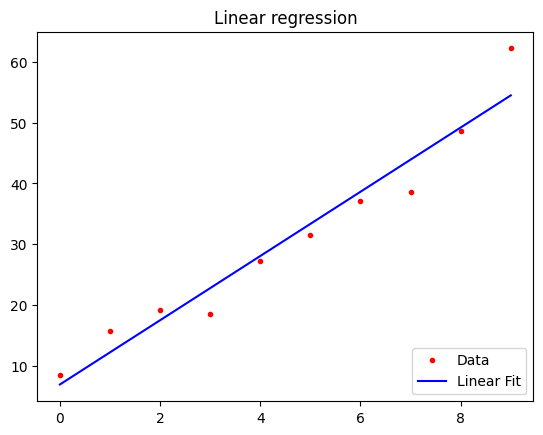

In [76]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [77]:
# with outliers
print("With outliers:")
for _ in range (5):
    new_x, new_y = generate_data(n_samples=10, outlier=True)

    # training linear regression model
    new_lr = LinearRegression()
    new_lr.fit(new_x[:, np.newaxis], new_y)
    y_pred = new_lr.predict(new_x[:, np.newaxis])
    
    s_2 = s2(new_y, y_pred)

    print(f'    b_0={new_lr.intercept_:.5f} et b_1={new_lr.coef_[0]:.5f} et s^2={s_2:.5f}')

print("\nWithout outliers:")
for _ in range (5):
    new_x, new_y = generate_data(n_samples=10, outlier=False)

    # training linear regression model
    new_lr = LinearRegression()
    new_lr.fit(new_x[:, np.newaxis], new_y)
    y_pred = new_lr.predict(new_x[:, np.newaxis])
    
    s_2 = s2(new_y, y_pred)
    
    print(f'    b_0={new_lr.intercept_:.5f} et b_1={new_lr.coef_[0]:.5f} et s^2={s_2:.5f}')


With outliers:
    b_0=9.93113 et b_1=4.57719 et s^2=26.66777
    b_0=5.98976 et b_1=5.15642 et s^2=25.50027
    b_0=8.92094 et b_1=4.88222 et s^2=33.24744
    b_0=8.43237 et b_1=4.87624 et s^2=34.17323
    b_0=5.81904 et b_1=5.18404 et s^2=52.44566

Without outliers:
    b_0=10.49517 et b_1=3.87598 et s^2=9.64053
    b_0=12.13435 et b_1=3.65044 et s^2=10.90816
    b_0=9.54511 et b_1=4.04210 et s^2=6.51136
    b_0=10.33815 et b_1=3.95277 et s^2=5.16449
    b_0=10.51957 et b_1=3.84694 et s^2=11.33779


La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [78]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [79]:
def profil_residuel(x, y, i):
    n = len(x)
    x_train = np.delete(x, i)
    y_train = np.delete(y, i)

    lr = LinearRegression()
    lr.fit(x_train[:, np.newaxis], y_train)

    y_pred = lr.predict(x[:, np.newaxis])

    e_i = y - y_pred

    return e_i

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

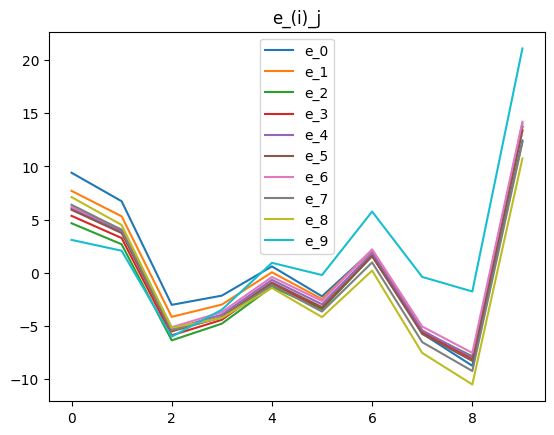

In [80]:
for j in range(len(x)):
    plt.plot(x, profil_residuel(x, y, j), label=f'e_{j}')
    plt.title("e_(i)_j")
    plt.legend()
    # print(f"i={i}, e_{i}={profil_residuel(x, y, j):.5f}")

#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [81]:
def cook(x, y, i):
     lr = LinearRegression()
     lr.fit(x[:, np.newaxis], y)

     y_pred = lr.predict(x[:, np.newaxis])

     Di = np.sum(profil_residuel(x, y, i)**2) / (2 * s2(y, y_pred))

     # pour avoir un resultat encore mieux on peut calculer cook avcec Y_pred mais sans la valeur (i)
    
     return Di

for j in range(len(x)):
    print(f" pour j={j},   Di={cook(x, y, j):.3f}")
    # print(f"i={i}, e_{i}={profil_residuel(x, y, j):.5f}")

 pour j=0,   Di=4.852
 pour j=1,   Di=4.581
 pour j=2,   Di=4.582
 pour j=3,   Di=4.529
 pour j=4,   Di=4.501
 pour j=5,   Di=4.512
 pour j=6,   Di=4.507
 pour j=7,   Di=4.586
 pour j=8,   Di=4.816
 pour j=9,   Di=6.271


## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [82]:
from scipy.stats import t

alpha = 0.5
n = len(x)
p = 2  # nombre de parametres dans le modele (b_0 et b_1)
t_threshold = t.ppf(1 - alpha / 2, n - p) 
